# **TASK - 5: FACE DETECTION AND RECOGNITION**
Develop an AI application that can detect and recognize faces in images or videos. Use pre-trained face detection models like Haar cascades or deep learning-based face detectors, and optionally add face recognition capabilities using techniques like Siamese networks or ArcFace.

25-10-21 06:23:54 - Directory /root/.deepface has been created
25-10-21 06:23:54 - Directory /root/.deepface/weights has been created
Please upload images to check:


Saving Caption_cool.jpeg to Caption_cool.jpeg
Saving Mahi.jpeg to Mahi.jpeg
Saving MS Dohni.jpg to MS Dohni.jpg
Saving MSD.jpg to MSD.jpg
Saving pathirana.jpg to pathirana.jpg
Saving rohit.jpg to rohit.jpg
Saving suresh_raina.jpg to suresh_raina.jpg
Saving virat.jpg to virat.jpg
Checking image: Caption_cool.jpeg
25-10-21 06:24:13 - 🔗 facenet_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5 to /root/.deepface/weights/facenet_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:00<00:00, 207MB/s]


✅ This is the known person!


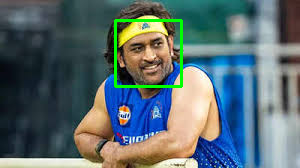


-----------------------------------------

Checking image: Mahi.jpeg
✅ This is the known person!


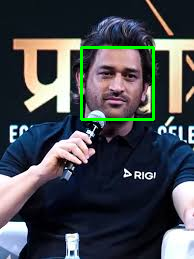


-----------------------------------------

Checking image: MS Dohni.jpg
✅ This is the known person!


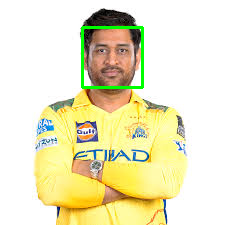


-----------------------------------------

Checking image: MSD.jpg
✅ This is the known person!


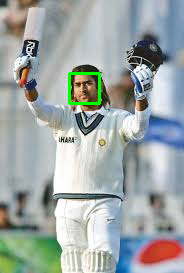


-----------------------------------------

Checking image: pathirana.jpg
❌ This is NOT the known person.


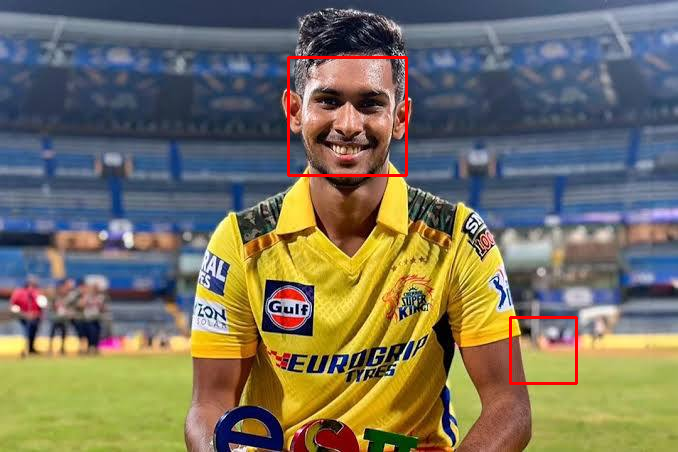


-----------------------------------------

Checking image: rohit.jpg
❌ This is NOT the known person.


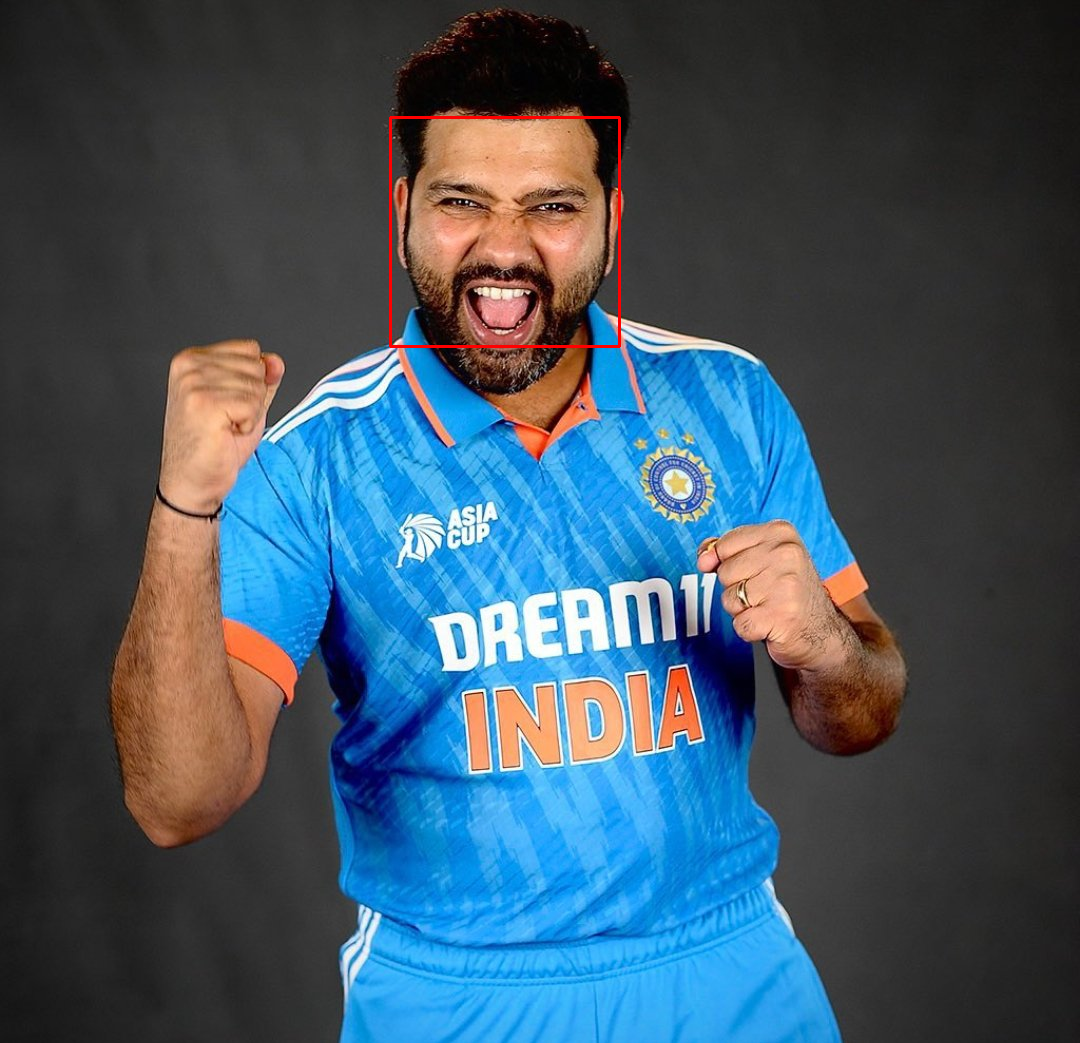


-----------------------------------------

Checking image: suresh_raina.jpg
❌ This is NOT the known person.


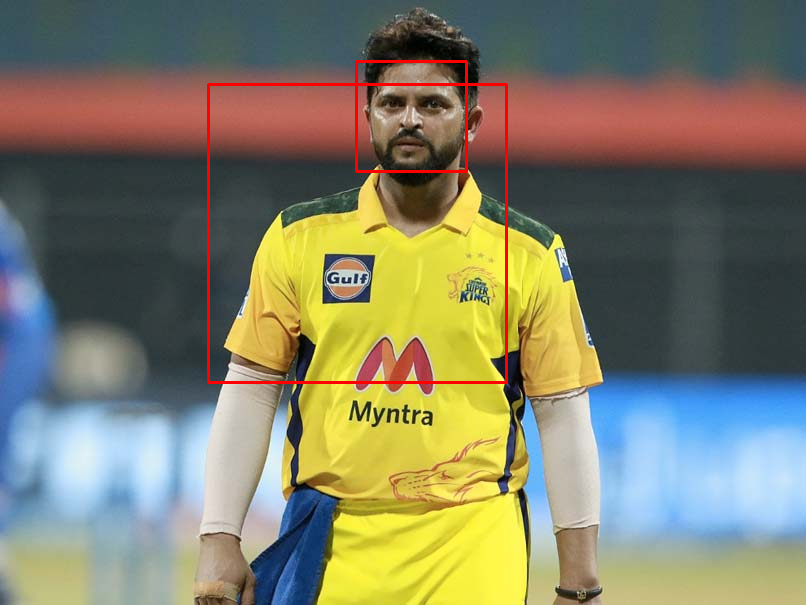


-----------------------------------------

Checking image: virat.jpg
❌ This is NOT the known person.


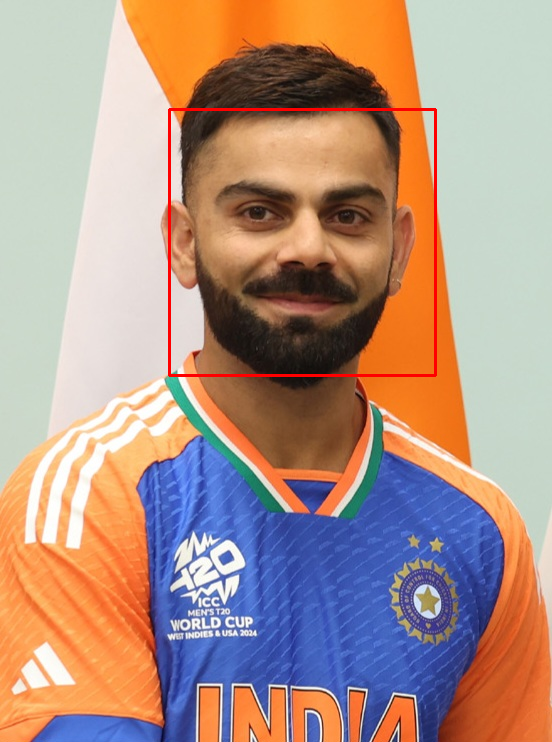


-----------------------------------------



In [4]:
import cv2
from deepface import DeepFace
from google.colab.patches import cv2_imshow
from google.colab import files

# Load the known image path
known_image_path = '/content/drive/MyDrive/Colab Notebooks/Task-5_Face_Detection/IMAGES/Mahi.jpeg'

# Upload multiple images to check
print("Please upload images to check:")
uploaded = files.upload()

for fn in uploaded.keys():
    print(f"Checking image: {fn}")
    unknown_image_path = fn

    try:
        # Verify if the uploaded image matches the known image
        result = DeepFace.verify(img1_path=known_image_path, img2_path=unknown_image_path, model_name='Facenet')

        # Load image for drawing
        unknown_image = cv2.imread(unknown_image_path)
        gray = cv2.cvtColor(unknown_image, cv2.COLOR_BGR2GRAY)

        # Detect faces using Haar Cascade
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        if result['verified']:
            print("✅ This is the known person!")
            color = (0, 255, 0)  # Green for known
        else:
            print("❌ This is NOT the known person.")
            color = (0, 0, 255)  # Red for unknown

        # Draw rectangle on all detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(unknown_image, (x, y), (x + w, y + h), color, 2)

        # Show result
        cv2_imshow(unknown_image)

    except Exception as e:
        print(f"⚠️ Error processing image {fn}: {e}")

    print("\n-----------------------------------------\n")
